In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Number 1: The Lane-Emden equation

$$\frac{1}{\xi^2}\frac{d}{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\theta^n$$

Using a numerical algorithm of your choosing, solve the Lane-Emden equation and plot
solutions for n = 0, 1, 2, 3, 4, 5. In addition, plot the case in which n gets very large (Recall that
the Lane-Emden equation is derived assuming $P = ρ^γ$ with $γ = (1 + 1/n)$. In each case, identify
the first zero of the solution ($\xi_1$). Use the boundary conditions that are discussed in the lecture
notes.
In a one-page write-up (11pt, single-spaced font), discuss the nature of the solutions. In your
write-up, include:
1. Motivation on why the Lane-Emden equation is used to model the structure of stars
2. The difference between the solutions in the radiative and convective regimes
3. Comparison of the solutions that you obtain for each n
4. Discussion of the algorithm that you used to obtain your solution (you don’t have to turn
in your code)

In [2]:
def Lane_Emden(n):
    theta_values = []
    xi_values = []
    
    #define values of xi, delta xi, the gradient and theta
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    
    #create a variable to store xi
    xi_now = xi
    
    #use while loop to find theta and xi values until theta=0
    while (theta >= 0) and (xi_now < 50):
        
        #increase xi value by small amount
        xi_now = xi_now + d_xi
    
        #calculate values after small increase in xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi

        #update the old values to be the new ones
        dtheta = dtheta_next
        theta  = theta_next
        
        #store these values in list
        theta_values.append(theta)
        xi_values.append(xi_now)
    
    #convert lists to arrays to make it easier to deal with
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    return (xi_values, theta_values)

In [3]:
xi_0, theta_0 = Lane_Emden(0)
xi_1, theta_1 = Lane_Emden(1)
xi_2, theta_2 = Lane_Emden(2)
xi_3, theta_3 = Lane_Emden(3)
xi_4, theta_4 = Lane_Emden(4)
xi_5, theta_5 = Lane_Emden(5)
xi_500, theta_500 = Lane_Emden(500)

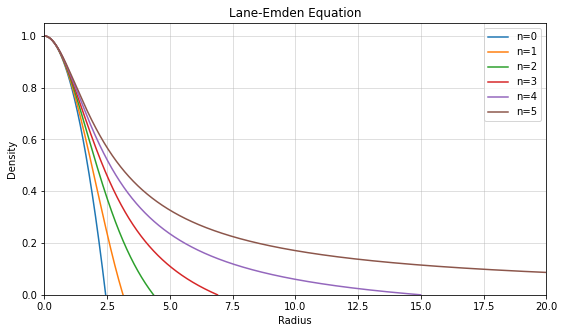

In [4]:
#plot the values of xi vs theta for each n value
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_0, theta_0, label = 'n=0')
axis.plot(xi_1, theta_1, label = 'n=1')
axis.plot(xi_2, theta_2, label = 'n=2')
axis.plot(xi_3, theta_3, label = 'n=3')
axis.plot(xi_4, theta_4, label = 'n=4')
axis.plot(xi_5, theta_5, label = 'n=5')
plt.grid(alpha = .5)
#set limits on the axes
axis.set_ylim(0)
axis.set_xlim(0, 20)
#give title and axes labels
axis.set_title('Lane-Emden Equation')
axis.set_ylabel('Density')
axis.set_xlabel('Radius')
#add a legend
axis.legend()
#save
#plt.savefig('Lane-Emden Equation.png',bbox = 'tight')
#show
plt.show()

In [5]:
#find the intercept of each plot, by using slicing to find the last known value of xi which is the intercept (theta =0)
int_0 = xi_0[-1]
int_1 = xi_1[-1]
int_2 = xi_2[-1]
int_3 = xi_3[-1]
int_4 = xi_4[-1]
int_5 = xi_5[-1]

print('Values of xi at theta = 0 for various n are as follows')
print('n=0:', '%.3f' %int_0)
print('n=1:', '%.3f' %int_1)
print('n=2:', '%.3f' %int_2)
print('n=3:', '%.3f' %int_3)
print('n=4:', '%.3f' %int_4)
print('n=5: unknown, as it never crosses the x-axis')

Values of xi at theta = 0 for various n are as follows
n=0: 2.448
n=1: 3.141
n=2: 4.353
n=3: 6.900
n=4: 14.993
n=5: unknown, as it never crosses the x-axis


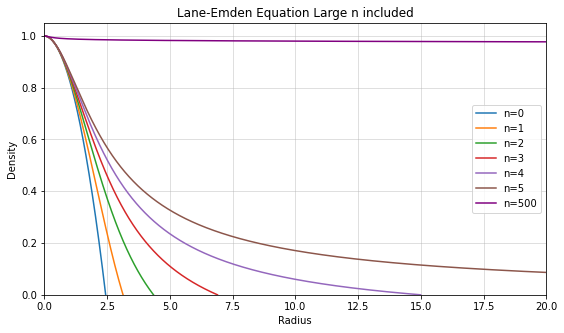

In [6]:
#plot the values of xi vs theta for each n value
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_0, theta_0, label = 'n=0')
axis.plot(xi_1, theta_1, label = 'n=1')
axis.plot(xi_2, theta_2, label = 'n=2')
axis.plot(xi_3, theta_3, label = 'n=3')
axis.plot(xi_4, theta_4, label = 'n=4')
axis.plot(xi_5, theta_5, label = 'n=5')
axis.plot(xi_500,theta_500,label='n=500', c = 'purple' )
plt.grid(alpha = .5)
#set limits on the axes
axis.set_ylim(0)
axis.set_xlim(0, 20)
#give title and axes labels
axis.set_title('Lane-Emden Equation Large n included')
axis.set_ylabel('Density')
axis.set_xlabel('Radius')
#add a legend
axis.legend()
#save
#plt.savefig('Lane-Emden Equation Big n.png',bbox = 'tight')
#show
plt.show()

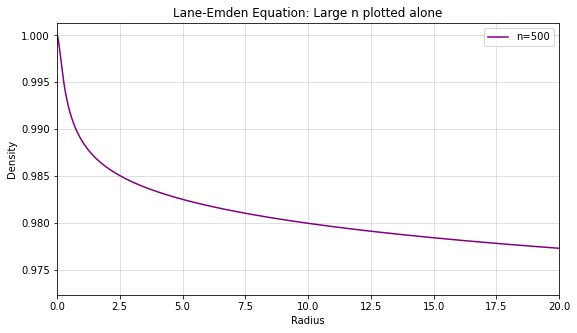

In [7]:
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_500,theta_500,label='n=500',c = 'purple')
plt.grid(alpha = .5)
#axis.set_ylim(0)
axis.set_xlim(0, 20)
axis.set_title('Lane-Emden Equation: Large n plotted alone')
axis.set_ylabel('Density')
axis.set_xlabel('Radius')
axis.legend()
#plt.savefig('Big n Lane-Emden Equation.png',bbox = 'tight')

# Number 2: Hyades Star Cluster

The hyades star cluster is approximately 40 pc from the Earth. Its coordinates may be
obtained from:

http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=hyades+cluster&submit=SIMBAD+search.

Using data from Gaia DR2, identify stars that are associated with the hyades. Similar to the
first assignment, write a short query to extract stars from the direction of the hyades. By finding
stars with parallax and proper motion close to that of the hyades, identify stars associated with
it. Plot the associated stars on a color magnitude diagram, and use this to find the luminosity
of the brightest star in your sample. Show that this luminosity agrees with the luminosity of
the main-sequence turn-off point as discussed in the lecture.

Write-up one page (11pt, single-spaced font) discussing your methodology and the results you
obtain. Your writeup should also include a brief introduction on the hyades cluster.

<b>Hyades info:</b>

<b>Ra:</b> 4h 27m 0s = 66.75$^\circ$ <br>
<b>Dec:</b> 15$^\circ$ 52m 12s = 15.87$^\circ$ <br>
<b>Parallax (mas*)</b> = 21.052

*note: mas is defined as "milliarcseconds"

In [8]:
Hyades1 = pd.read_csv("Hydes Data Resolved.csv")
Hyades2 = pd.read_csv("Hydes Data 3 degree rule.csv")
Hyades3 = pd.read_csv("Hydes Data Self-Query.csv")

Hyades 1 data was collected from the resolved data set from Gaia itself with no other conditions.

Hyades 2 data was collected from isolating the ra and dec of the center of the star cluster and adding a 3 degree fluctuation in both the negative and positive direction. There was also a constraint on parallax (mas) with a 2 degree fluctuation in the negative and positve.

Hyades 3 was collected using a similar method to Hyades 2, except the conditions were lessened considerably with a broad range of 10 degrees given in ra and dec, and for parallax (mas) the range was extended out to 5.

The specific constraints on each data set are:

Hyades 1: Typing Hyades in the "Name" box in Gaia <br>
<b>Hyades 2: Adding 3 Conditions; ra [63.75-69.75], dec [12.87,18.87], parallax [19.052-23.052] </b><br>
Hyades 3: Adding 3 Conditions; ra [60-70], dec [10-20], parallax [19-24]

We will be using the Hyades 2 data for this project.

In [9]:
len(Hyades1),len(Hyades2),len(Hyades3)

(139, 157, 291)

We first define the variables "data" and "name" to be the set of objects we are observing and what we are calling it, we define it here first for convienience, in case we want to change data sets.

In [10]:
data = Hyades2    #The data set you will be using
name = "Hyades"   #Name of your star cluster

In [11]:
#Opening the table of data points and removing stars with NaN variables for luminosity
data =data[data['lum_val'].notna()]
data = data.reset_index(drop=True)
data.head()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,3314024566918614528,65.734209,0.381058,17.542395,0.213475,19.063189,0.369907,3.415541,1.160408,NaN,NaN,NOT_AVAILABLE,4946.5000,NaN,98.514800
1,3312602348628348032,68.634498,0.048855,15.827469,0.022797,19.112002,0.056992,9.407179,1.092431,40.004075,0.207409,NOT_AVAILABLE,5036.0450,0.0330,0.385594
2,3313241714640886400,69.604395,0.127283,17.542293,0.066202,19.116419,0.170502,9.691323,1.478089,NaN,NaN,NOT_AVAILABLE,4453.5273,NaN,0.354225
3,3313070293905997824,69.000751,0.353146,16.540674,0.272137,19.126738,0.427356,10.292080,1.605209,44.785935,0.917492,NOT_AVAILABLE,4202.4700,1.2060,0.229784
4,3311151229500925952,66.052451,0.415919,14.758158,0.354119,19.537117,0.503467,7.427813,0.793955,41.240529,0.214000,NOT_AVAILABLE,5905.5000,0.3823,2.070158


In [12]:
#Pulling out the data points we will be using
full_Mag = data.phot_g_mean_mag.values
full_BPRP = data.bp_rp.values
full_par = data.parallax.values
full_ra = data.ra.values
full_dec = data.dec.values
full_lum = data.lum_val.values

print("So the amount of stars we have identified within the "+name+" star cluster is:")
print(len(data))

So the amount of stars we have identified within the Hyades star cluster is:
81


Gaia's scientific performance sheet states that magnitudes above 16 are subjected to errors due to how they collect data. Because of this concern, I will be filtering out any stars with a magnitude above 16.

In [13]:
Mag = []
BPRP = []
par = []
Ra = []
Dec = []
Lum = []

#The filter
for i in range(len(data)):
    if full_Mag[i] > 16:
        pass
    else:
        Mag.append(full_Mag[i])
        BPRP.append(full_BPRP[i])
        par.append(full_par[i])
        Ra.append(full_ra[i])
        Dec.append(full_dec[i])
        Lum.append(full_lum[i])
        
print("The total amount of data points that fall below a magnitude of 16 is: " + str(len(Mag)))
print("So due to the filter, we pulled out "+ str(len(data)-len(Mag)) +" stars.")

The total amount of data points that fall below a magnitude of 16 is: 81
So due to the filter, we pulled out 0 stars.


In [14]:
#Determining the distance away from converting parallax into parsecs, then color coding it into a gradient
cmap = []

distance = np.abs(par)/1000
colors = 1/distance

for i in range(len(Mag)):
    cmap.append(colors[i])

<b>Plotting the location of the stars on the sky in Ra and Dec:<b/>

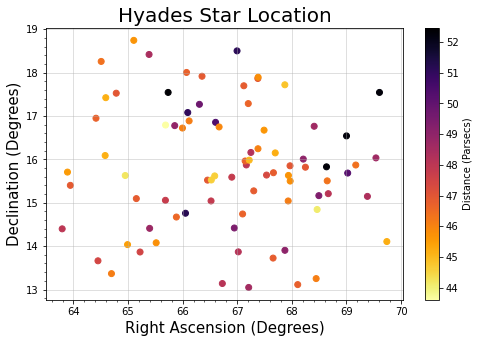

In [15]:
plt.figure(figsize = [8,5])
plt.title( name+' Star Location', fontsize = 20)
plt.grid(alpha = .5)
plt.scatter(Ra, Dec, c = cmap, cmap = 'inferno_r')
cb = plt.colorbar(label = 'Distance (Parsecs)', spacing = 'proportional')
plt.minorticks_on()
plt.xlabel('Right Ascension (Degrees)',fontsize = 15)
plt.ylabel('Declination (Degrees)',fontsize = 15)
#plt.savefig("Hyades Star Location.png")

plt.show()

<b>Plotting the Color Magnitude Diagram of the Star Cluster</b>

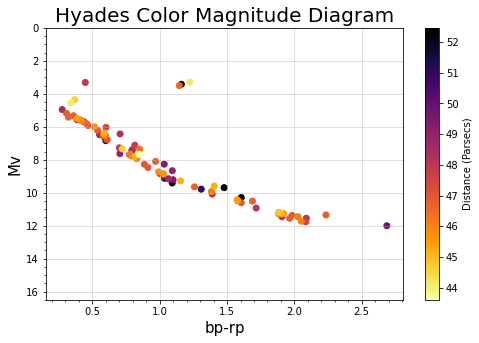

In [16]:
plt.figure(figsize = [8,5])
plt.title(name+' Color Magnitude Diagram', fontsize = 20)
plt.grid(alpha = .5)
plt.scatter(BPRP,Mag,c =cmap, cmap = 'inferno_r')
cb = plt.colorbar(label = 'Distance (Parsecs)')
plt.minorticks_on()
plt.xlabel('bp-rp', fontsize = 15)
plt.ylabel('Mv', fontsize = 15)
plt.ylim(16.5,0)
#plt.savefig('Hyades CMD.png',bbox = 'tight')


plt.show()

Now, when calculating the luminosity of the star clusters brightest star, we must use 2 equations:

$$M = m + 5 - 5log(D)$$

$$M =4.77 - 2.5 log_{10}\Big(\frac{L}{L_o}\Big)$$

Where $m$ is the apparent magnitude of the star (our $M_v$ values), $D$ is the distance to the star in parsecs, $M$ is the absolute magnitude of the desired star, $L$ is the luminosity of the desired star, 4.77 is the absolute magnitude of the sun, and $L_o$ is the luminosity of the sun ($3.862 x 10^{16}$ Watts)

As magnitude is measuered inversly (The higher the number results in the dimmer the object) we must search for the star with the lowest absolute magnitude in the cluster to find the brightest star.

In [17]:
par_mag = []
bp_mag = []
lum_mag = []
l_o = 3.862e16

#finding the star with the lowest magnitude (Brightest star)
Max_mag = np.min(Mag)
Max_mag

#finding the parallax angel of the lowest magnitude star
for i in range(len(data)):
    if(data.phot_g_mean_mag[i] == Max_mag):
        par_mag.append(data.parallax[i])
        bp_mag.append(data.bp_rp[i])
        lum_mag.append(data.lum_val[i])
    else:
        pass
#correcting the parallax angel to distance (Parsecs)
distance_mag = 1/(np.abs(par_mag)/1000)

#solving for the Luminosity
abs_mag = Max_mag + 5-5*np.log10(distance_mag)   #Equation 1

lum_bright = 10**(-(abs_mag - 4.77)/2.5)    #Equation 2

print("The star with the Brightest absolute magnitude in the "+name+" star cluser has:")
print("Apparent magnitude of "+str(round((Max_mag),3)) + " M")
print("Distance of "+str(round((distance_mag[0]),3))+" Parsecs")
print("Luminosity of " +str(round(lum_mag[0],3)) + " L_o")

The star with the Brightest absolute magnitude in the Hyades star cluser has:
Apparent magnitude of 3.29 M
Distance of 44.202 Parsecs
Luminosity of 83.791 L_o


Comparing the Luminosity we calculated to the Luminosity Gaia has

In [18]:
print("Luminosity we calculated: "+ str(round(lum_bright[0],4))+" L_o")
print("Luminosity Gaia has: " +str(round(lum_mag[0],4)) + " L_o")
print("They are close enough to where they fall within the magins of error.")

Luminosity we calculated: 76.3641 L_o
Luminosity Gaia has: 83.791 L_o
They are close enough to where they fall within the magins of error.


Even though we found the equation to be valid, <b>this is way above the expected Luminosity of the cluster</b> and there is a chance this Star is an outlier, so we will add some more constraints on our selection, first to get a better idea of what luminosity values we are looking at, lets plot the luminosity in respect to bp-rp.

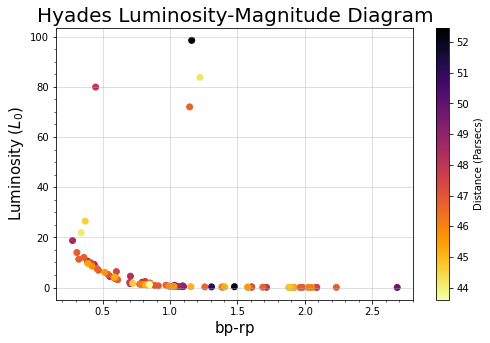

In [19]:
plt.figure(figsize = [8,5])
plt.title(name+' Luminosity-Magnitude Diagram', fontsize = 20)
plt.grid(alpha = .5)
plt.scatter(BPRP,Lum,c =cmap, cmap = 'inferno_r')
cb = plt.colorbar(label = 'Distance (Parsecs)')
plt.minorticks_on()
plt.xlabel('bp-rp', fontsize = 15)
plt.ylabel('Luminosity $  (L_0)$', fontsize = 15)
plt.show()

The luminosity we found was the yellow dot, found at ~roughly (1.25, 83). While this is a very bright star within the cluster, this is not the cutoff Luminosity we desire. For that we must look at the position of stars which begin to rise off the standard line. The data point we will be ovserving is the last point that remains with the group without a large distance in between, in this example it is the 8th smallest Luminosity

In [20]:
sortedlum = sorted(data.lum_val)
cut_lum = sortedlum[-8]   #This is the desired cutoff luminosity

par_ex = []
bp_ex = []
lum_ex = []
mag_ex = []
abs_mag = []

for i in range(len(data)):
    if(data.lum_val[i] == cut_lum):
        par_ex.append(data.parallax[i])
        bp_ex.append(data.bp_rp[i])
        lum_ex.append(data.lum_val[i])
        mag_ex.append(data.phot_g_mean_mag[i])
    else:
        pass
    
#Solving for distance
distance_ex = 1/(np.abs(par_ex[0])/1000)

#solving for the Luminosity
abs_mag = mag_ex[0] + 5 - 5 * np.log10(distance_ex)   #Equation 1

lum = 10**(-(abs_mag - 4.74)/2.5)    #Equation 2

                      
print("The cuttoff Luminosity in the "+name+" star cluser is:")
print(str(round(cut_lum,4)) + " L_o")
print("With an Apparent magnitude of "+str(round(mag_ex[0],4)) + " M")
print(bp_ex)

The cuttoff Luminosity in the Hyades star cluser is:
13.978 L_o
With an Apparent magnitude of 5.1797 M
[0.30777407]


Once again compairing the Luminosity we calculated to the Luminosity Gaia has measured:

In [21]:
print("Luminosity we calculated: "+ str(round(lum,4))+ " L_o")
print("Luminosity Gaia has: " +str(round(lum_ex[0],4))+ " L_o")
print("They are close enough to where they fall within the magins of error.")

Luminosity we calculated: 14.6475 L_o
Luminosity Gaia has: 13.978 L_o
They are close enough to where they fall within the magins of error.


<b>So we can confidentially say the the cutoff Luminosity of the Hyades star cluster is around $14 L_0$</b>